In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00


In [2]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [4]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [5]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


# **Programming Tasks**

***1. Change the marked state***

Try different marked states such as 001, 111, or 010 and observe the output histogram.

In [17]:
if __name__ == "__main__":
    # Try different marked states by changing this value
    for marked_state in ["001", "111", "010"]:
        print(f"\nSearching for marked state: {marked_state}")
        qc = grover_search(marked_state)
        print(qc.draw(fold=-1))
        run_grover(qc)


Searching for marked state: 001
     ┌───┐┌───┐     ┌───┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤├───┤  │  ├───┤├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 
{'001': 29, '101': 36, '110': 28, '010': 27, '000': 40, '111': 36, '011': 32, '100': 796}

Searching for marked state: 111
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐   
q_1:

***2. Modify the number of qubits***

Extend the algorithm to 4 qubits and update the oracle and diffuser accordingly.

In [21]:
# --- Task 2: Extend to 4 qubits ---

if __name__ == "__main__":
    marked_state = "1101"  # 4-qubit marked state
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 1101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3 
{'0101': 34, '1001': 37, '1011': 482, '0111': 26, '0011': 44, '1110': 34, '1010': 44, '1101': 33, '1100': 33, '0110': 35, '1000': 38, '0010': 40, '0000': 37, '0001'

***3. Add multiple iterations***

Run the oracle and diffuser steps multiple times to increase the probability of finding the marked state.



In [22]:
# --- Task 3: Multiple Grover iterations ---

def grover_search_iterations(marked_state, iterations=2):
    """Build Grover's search circuit with multiple iterations."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))  # Initialization

    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)

    qc.measure(range(n), range(n))
    return qc

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search_iterations(marked_state, iterations=3)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X

***4. Circuit Visualization***

Use qc.draw('mpl') to visualize the circuit structure in the notebook.



In [23]:
# Visualize the circuit in text form
print(qc.draw())


     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐»
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤»
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├»
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤»
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               »
«q_0: ┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──»
«     ├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  »
«q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────

***5. Experiment with Noise***
Add a noise model using Qiskit Aer’s NoiseModel and compare results with the ideal simulator.

In [24]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError

# --- Create Noise Model ---
noise_model = NoiseModel()

p_gate = 0.02   # Gate noise
p_read = 0.03   # Measurement noise

# Add gate noise
noise_model.add_all_qubit_quantum_error(depolarizing_error(p_gate, 1), ['x', 'h'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(p_gate, 2), ['cx'])

# Add readout noise
readout_error = ReadoutError([
    [1 - p_read, p_read],
    [p_read, 1 - p_read]
])
noise_model.add_all_qubit_readout_error(readout_error)

# Backend
sim_noisy = Aer.get_backend('qasm_simulator')

# Transpile and run with noise
tqc = transpile(qc, sim_noisy)
result_noisy = sim_noisy.run(tqc, noise_model=noise_model, shots=2048).result()
counts_noisy = result_noisy.get_counts()

print("Noisy Result Counts:")
print(counts_noisy)


Noisy Result Counts:
{'010': 225, '000': 192, '110': 177, '101': 627, '001': 199, '100': 223, '011': 203, '111': 202}


***6. Real Hardware Execution (Optional)***
If you have IBM Quantum credentials, try running the same circuit on a real IBMQ backend and compare the histogram results.

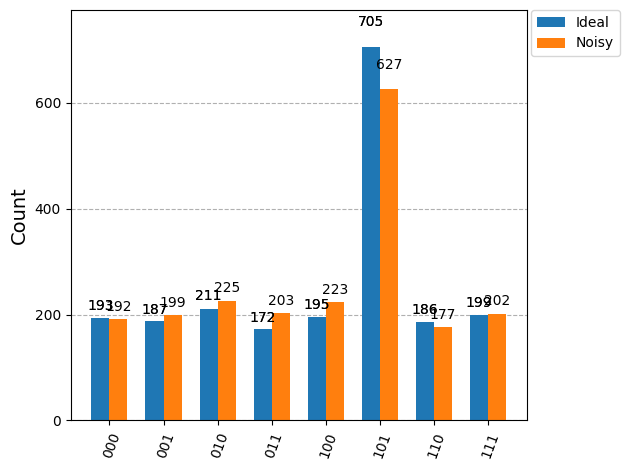

In [25]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

sim_ideal = Aer.get_backend('qasm_simulator')

# Ideal run (no noise)
tqc2 = transpile(qc, sim_ideal)
result_ideal = sim_ideal.run(tqc2, shots=2048).result()
counts_ideal = result_ideal.get_counts()

# Compare
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])
